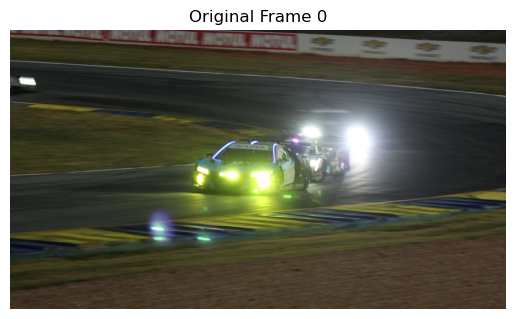

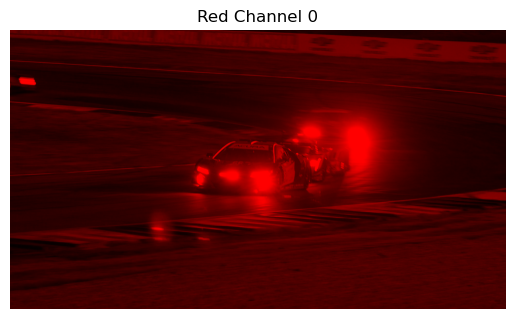

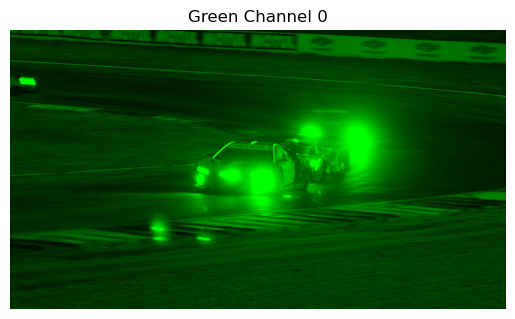

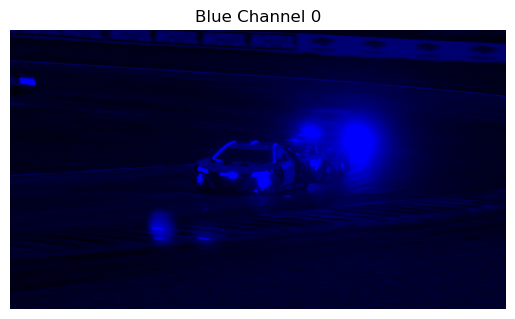

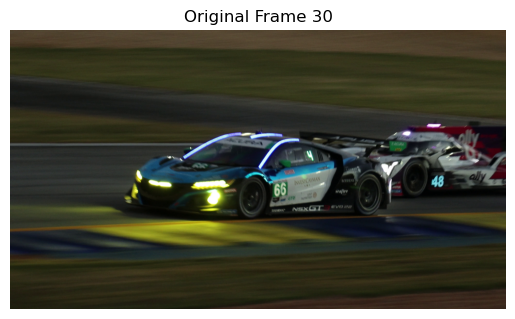

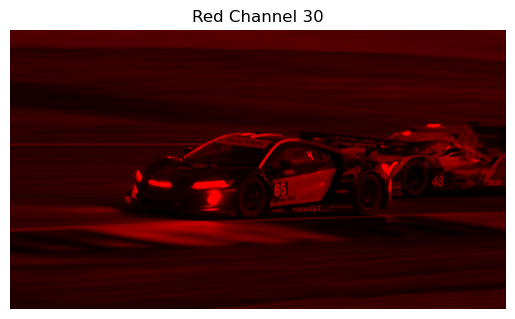

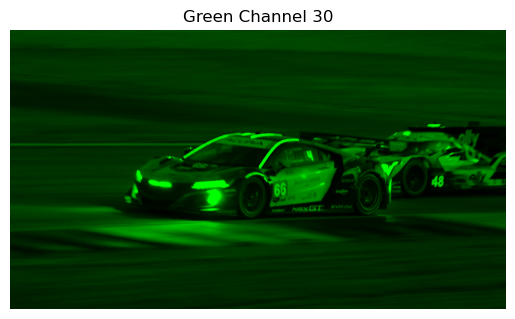

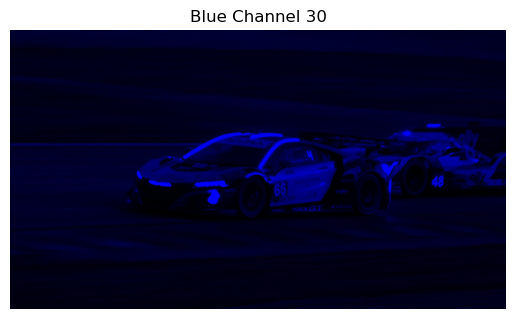

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the video
video_path = "le_mans.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_interval = 30  # Extract one frame every 30 frames
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break  # Exit loop if no frame is read

    # Extract frames at specific intervals
    if frame_count % frame_interval == 0:
        # Convert frame from BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Split channels
        red_channel = frame_rgb.copy()
        red_channel[:, :, 1] = 0  # Set green to 0
        red_channel[:, :, 2] = 0  # Set blue to 0

        green_channel = frame_rgb.copy()
        green_channel[:, :, 0] = 0  # Set red to 0
        green_channel[:, :, 2] = 0  # Set blue to 0

        blue_channel = frame_rgb.copy()
        blue_channel[:, :, 0] = 0  # Set red to 0
        blue_channel[:, :, 1] = 0  # Set green to 0

        # Display each image separately
        plt.figure()
        plt.imshow(frame_rgb)
        plt.title(f"Original Frame {frame_count}")
        plt.axis("off")
        plt.show()

        plt.figure()
        plt.imshow(red_channel)
        plt.title(f"Red Channel {frame_count}")
        plt.axis("off")
        plt.show()

        plt.figure()
        plt.imshow(green_channel)
        plt.title(f"Green Channel {frame_count}")
        plt.axis("off")
        plt.show()

        plt.figure()
        plt.imshow(blue_channel)
        plt.title(f"Blue Channel {frame_count}")
        plt.axis("off")
        plt.show()

    frame_count += 1

# Release video capture
cap.release()
cv2.destroyAllWindows()
